In [103]:
import numpy as np
import PIL
import os
import matplotlib.pyplot as plt
from PIL import Image

(512, 768)


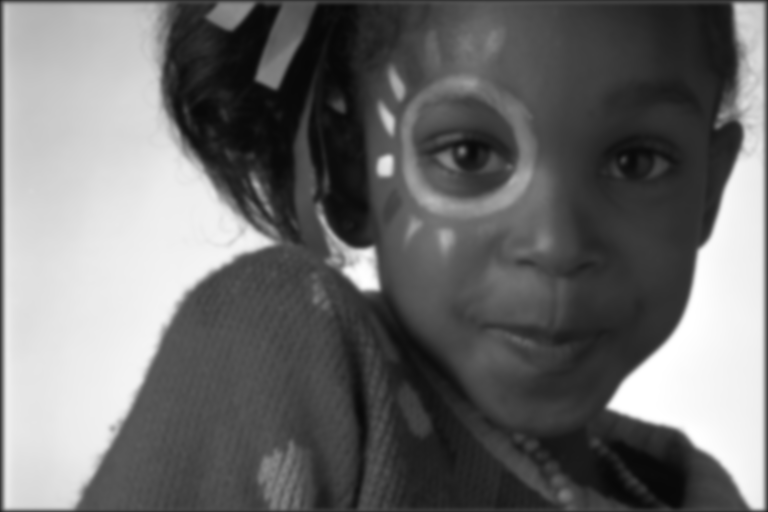

In [104]:
img14g = Image.open('images-restoration/img14g.tif') #greyscale - Y
img14bl = Image.open('images-restoration/img14bl.tif') #blurred - X

#convert images to numpy
Y_img = np.uint8(img14g)
X_img = np.uint8(img14bl)
print(Y_img.shape) #512 x 768 (H x W)
display(img14bl)

(950, 1) (950, 49)
0.999027678713901
(49, 1)
(950, 1)


Text(0.5, 1.0, 'Optimal filter for img14bl.tif')

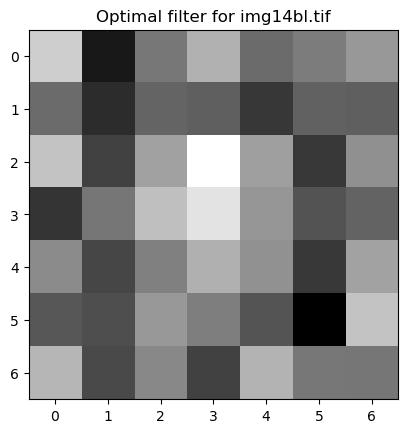

In [105]:
#Compute estimates of cov matrix R^zz and cross correlation r^zy for a 7 x 7 prediction window. 
# X is the corrupted image
# Y is the non corrupted image
# sample pairs zs, ys at every 20th row and column. 

# first, get every 20th row and column's pixel from Y (the good image) - store that in Y
# then, get every 20th row and columns' 7 x 7 window, store each window in a row of Z. 

Y = []

for row in range(Y_img.shape[0]):
    for col in range(Y_img.shape[1]):
        if (row % 20 == 0) and (col % 20 == 0) and (row != 0) and (col != 0):
            Y.append(Y_img[row,col])

Y = np.array(Y) 
Y = Y.reshape(950,1)
            

Z = np.empty((950,49)) #number of pixels stored in Y by the window size (7 x 7)
count = 0
for row in range(X_img.shape[0]):
    for col in range(X_img.shape[1]):
        if (row % 20 == 0) and (col % 20 == 0) and (row != 0) and (col != 0):#  and (row < 100) and (col < 100):
            #get 7 by 7 window around that pixel
            #print('i is', row, 'j is', col)
            window = X_img[row-3:row+4,col-3:col+4]
            #print(window.shape)
            window = window.reshape(-1, 49)
            #print(window.shape)
            #print(int(row / 20))
            #print('in row', row, 'and col', col)
            Z[count, :] = window
            count += 1
            #print('just filled in row', count - 1)
            
print(Y.shape, Z.shape)

#compute Rzz 
#Rzz_hat = (Z.T @ Z) / float(950)
Rzz_hat = ((Z.T).dot(Z))/float(Z.shape[0])
#rzy_hat = (Z.T @ Y) / float(950)
rzy_hat = ((Z.T).dot(Y))/float(Z.shape[0])

#using the estimates of covariance and cross correlation, compute the filter co-efficients.

theta = np.linalg.inv(Rzz_hat) @ rzy_hat
print(np.sum(theta))
print(theta.shape)
y_hat = Z @ theta
print(y_hat.shape)
plt.imshow(theta.reshape(7,7), cmap = 'gray')
plt.title("Optimal filter for img14bl.tif")

(500, 760)
[[ 1.52077844 -1.68334408 -0.01470558  0.99925446 -0.22061323  0.06709985
   0.56721855]
 [-0.21965958 -1.31170747 -0.35522001 -0.440704   -1.13948341 -0.40670626
  -0.43018349]
 [ 1.34146165 -0.97000061  0.71950542  2.38605037  0.6887928  -1.11641599
   0.4173528 ]
 [-1.17544225 -0.03609406  1.24835338  1.89662332  0.52307269 -0.64130652
  -0.35914587]
 [ 0.32864453 -0.87344021  0.13845858  0.98663353  0.44027126 -1.1208038
   0.73296795]
 [-0.57797679 -0.74018757  0.55932199  0.10562812 -0.63603457 -2.11777812
   1.33494943]
 [ 1.08636788 -0.81388456  0.28325204 -0.96834083  1.04740942 -0.02050305
  -0.03075889]]


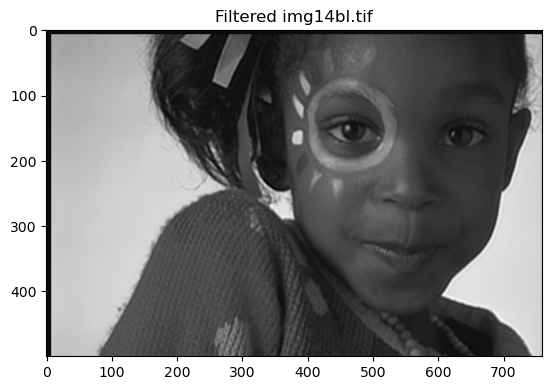

In [106]:
#apply linear filter:
# y^s = zs * theta, where y^s is the estimate at a pixel and zx is a row vector of pixels surrounding x
est_img = np.zeros((500, 760))
for row in range(X_img.shape[0]):
    for col in range(X_img.shape[1]):
        #get window:
        if (row > 7) and (col > 7) and (row < 500) and (col < 760):
            window = X_img[row - 3: row + 4, col - 3 : col + 4]
            window = window.reshape(-1,49)
            
            estimate = window @ theta
            est_img[row,col] = estimate
            
        
print(est_img.shape)    
plt.imshow(est_img, cmap = 'gray')
plt.title("Filtered img14bl.tif")
print(theta.reshape(7,7))

(512, 768)


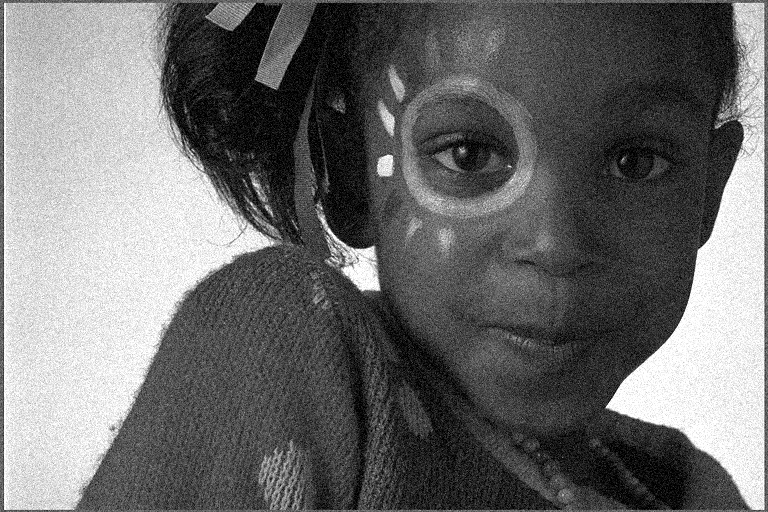

In [107]:
#redo procedure for img14gn.tif as X
img14gn = Image.open('images-restoration/img14gn.tif') #corrputed - X

#convert images to numpy
Y_img = np.uint8(img14g)
X_img = np.uint8(img14gn)
print(Y_img.shape) #512 x 768 (H x W)
display(img14gn)

(950, 1) (950, 49)
1.0059427113467159
(49, 1)
(950, 1)


Text(0.5, 1.0, 'Filter for img14gn.tif')

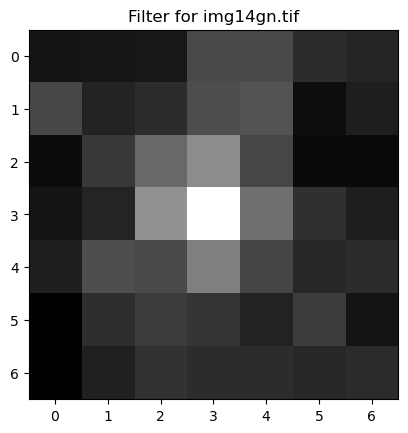

In [108]:
#Compute estimates of cov matrix R^zz and cross correlation r^zy for a 7 x 7 prediction window. 
# X is the corrupted image
# Y is the non corrupted image
# sample pairs zs, ys at every 20th row and column. 

# first, get every 20th row and column's pixel from Y (the good image) - store that in Y
# then, get every 20th row and columns' 7 x 7 window, store each window in a row of Z. 

Y = []

for row in range(Y_img.shape[0]):
    for col in range(Y_img.shape[1]):
        if (row % 20 == 0) and (col % 20 == 0) and (row != 0) and (col != 0):
            Y.append(Y_img[row,col])

Y = np.array(Y) 
Y = Y.reshape(950,1)
            

Z = np.empty((950,49)) #number of pixels stored in Y by the window size (7 x 7)
count = 0
for row in range(X_img.shape[0]):
    for col in range(X_img.shape[1]):
        if (row % 20 == 0) and (col % 20 == 0) and (row != 0) and (col != 0):#  and (row < 100) and (col < 100):
            #get 7 by 7 window around that pixel
            #print('i is', row, 'j is', col)
            window = X_img[row-3:row+4,col-3:col+4]
            #print(window.shape)
            window = window.reshape(-1, 49)
            #print(window.shape)
            #print(int(row / 20))
            #print('in row', row, 'and col', col)
            Z[count, :] = window
            count += 1
            #print('just filled in row', count - 1)
            
print(Y.shape, Z.shape)

#compute Rzz 
#Rzz_hat = (Z.T @ Z) / float(950)
Rzz_hat = ((Z.T).dot(Z))/float(Z.shape[0])
#rzy_hat = (Z.T @ Y) / float(950)
rzy_hat = ((Z.T).dot(Y))/float(Z.shape[0])

#using the estimates of covariance and cross correlation, compute the filter co-efficients.

theta = np.linalg.inv(Rzz_hat) @ rzy_hat
print(np.sum(theta))
print(theta.shape)
y_hat = Z @ theta
print(y_hat.shape)
plt.imshow(theta.reshape(7,7), cmap = 'gray')
plt.title("Filter for img14gn.tif")

(500, 760)
[[-0.01064679 -0.00878248 -0.00785871  0.03652983  0.03588477  0.01149822
   0.00347734]
 [ 0.03537147  0.00346609  0.01106458  0.04051956  0.04606868 -0.0168698
  -0.00159275]
 [-0.01844371  0.02137353  0.0656949   0.09632869  0.03371447 -0.01886859
  -0.02013767]
 [-0.01057593  0.00430173  0.10154427  0.19908836  0.07168439  0.01551672
  -0.00151856]
 [-0.00038936  0.04068169  0.03707952  0.08505287  0.03326219  0.00696487
   0.01191204]
 [-0.02853707  0.01278258  0.02583291  0.01794279  0.00189297  0.02498127
  -0.01053779]
 [-0.0283828   0.00074271  0.01642021  0.0119555   0.01168785  0.0066041
   0.01016106]]


Text(0.5, 1.0, 'Filtered img14gn.tif')

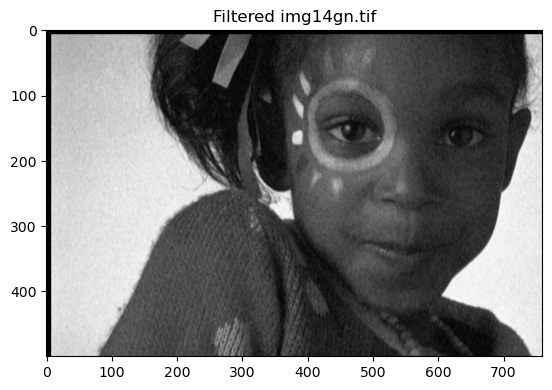

In [109]:
#apply linear filter:
# y^s = zs * theta, where y^s is the estimate at a pixel and zx is a row vector of pixels surrounding x
est_img = np.zeros((500, 760))
for row in range(X_img.shape[0]):
    for col in range(X_img.shape[1]):
        #get window:
        if (row > 7) and (col > 7) and (row < 500) and (col < 760):
            window = X_img[row - 3: row + 4, col - 3 : col + 4]
            window = window.reshape(-1,49)
            
            estimate = window @ theta
            est_img[row,col] = estimate
            
        
print(est_img.shape)    
plt.imshow(est_img, cmap = 'gray')
print(theta.reshape(7,7))
plt.title("Filtered img14gn.tif")

(512, 768)


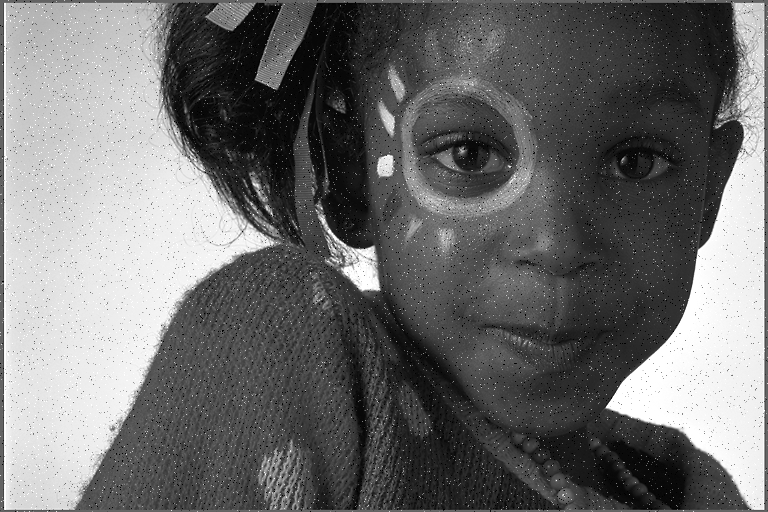

In [110]:
#repeat procedure using img14sp.tif for X
img14sp = Image.open('images-restoration/img14sp.tif') #corrupted - X

#convert images to numpy
Y_img = np.uint8(img14g)
X_img = np.uint8(img14sp)
print(Y_img.shape) #512 x 768 (H x W)
display(img14sp)

(950, 1) (950, 49)
1.0025762449658338
(49, 1)
(950, 1)


Text(0.5, 1.0, 'Optimal filter for img14sp')

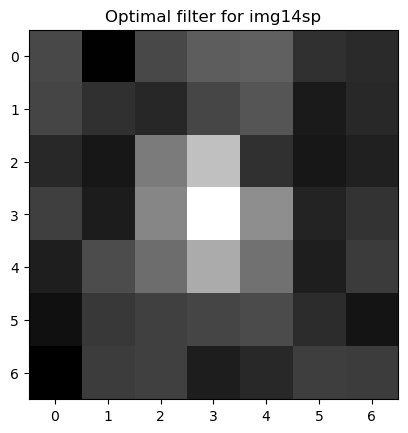

In [111]:
#Compute estimates of cov matrix R^zz and cross correlation r^zy for a 7 x 7 prediction window. 
# X is the corrupted image
# Y is the non corrupted image
# sample pairs zs, ys at every 20th row and column. 

# first, get every 20th row and column's pixel from Y (the good image) - store that in Y
# then, get every 20th row and columns' 7 x 7 window, store each window in a row of Z. 

Y = []

for row in range(Y_img.shape[0]):
    for col in range(Y_img.shape[1]):
        if (row % 20 == 0) and (col % 20 == 0) and (row != 0) and (col != 0):
            Y.append(Y_img[row,col])

Y = np.array(Y) 
Y = Y.reshape(950,1)
            

Z = np.empty((950,49)) #number of pixels stored in Y by the window size (7 x 7)
count = 0
for row in range(X_img.shape[0]):
    for col in range(X_img.shape[1]):
        if (row % 20 == 0) and (col % 20 == 0) and (row != 0) and (col != 0):#  and (row < 100) and (col < 100):
            #get 7 by 7 window around that pixel
            #print('i is', row, 'j is', col)
            window = X_img[row-3:row+4,col-3:col+4]
            #print(window.shape)
            window = window.reshape(-1, 49)
            #print(window.shape)
            #print(int(row / 20))
            #print('in row', row, 'and col', col)
            Z[count, :] = window
            count += 1
            #print('just filled in row', count - 1)
            
print(Y.shape, Z.shape)

#compute Rzz 
#Rzz_hat = (Z.T @ Z) / float(950)
Rzz_hat = ((Z.T).dot(Z))/float(Z.shape[0])
#rzy_hat = (Z.T @ Y) / float(950)
rzy_hat = ((Z.T).dot(Y))/float(Z.shape[0])

#using the estimates of covariance and cross correlation, compute the filter co-efficients.

theta = np.linalg.inv(Rzz_hat) @ rzy_hat
print(np.sum(theta))
print(theta.shape)
y_hat = Z @ theta
print(y_hat.shape)
plt.imshow(theta.reshape(7,7), cmap = 'gray')
plt.title("Optimal filter for img14sp")

(500, 760)
[[ 2.56095008e-02 -3.53072936e-02  2.53969487e-02  4.34553072e-02
   4.62636058e-02  5.03826473e-03 -1.29385713e-04]
 [ 2.32234398e-02  4.76019769e-03 -2.84236262e-03  2.36041657e-02
   3.70025979e-02 -1.41997791e-02 -2.34652596e-03]
 [-1.46019926e-03 -1.71623187e-02  6.91932695e-02  1.28875457e-01
   5.94915472e-03 -1.69516546e-02 -7.74036630e-03]
 [ 1.77067176e-02 -1.23008553e-02  7.86411409e-02  1.83431176e-01
   8.58602780e-02 -6.29500576e-03  7.41181711e-03]
 [-1.05863806e-02  2.92631012e-02  5.72837979e-02  1.10575905e-01
   6.13136206e-02 -1.10220078e-02  1.42166012e-02]
 [-2.27890686e-02  1.28222553e-02  1.84711174e-02  2.27415319e-02
   2.81308875e-02  1.07955323e-03 -1.97388209e-02]
 [-3.70105746e-02  1.55019572e-02  1.83210853e-02 -1.17677355e-02
  -1.50985930e-03  1.65750027e-02  1.60169838e-02]]


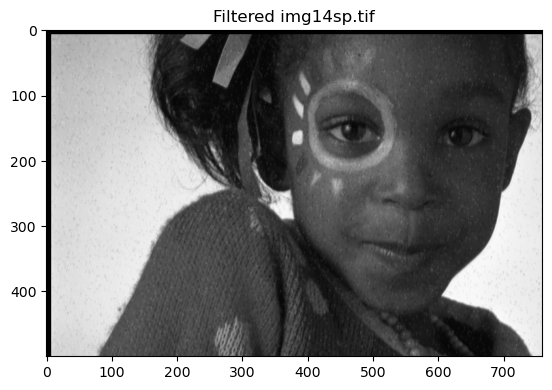

In [112]:
#apply linear filter:
# y^s = zs * theta, where y^s is the estimate at a pixel and zx is a row vector of pixels surrounding x
est_img = np.zeros((500, 760))
for row in range(X_img.shape[0]):
    for col in range(X_img.shape[1]):
        #get window:
        if (row > 7) and (col > 7) and (row < 500) and (col < 760):
            window = X_img[row - 3: row + 4, col - 3 : col + 4]
            window = window.reshape(-1,49)
            
            estimate = window @ theta
            est_img[row,col] = estimate
            
        
print(est_img.shape)    
plt.imshow(est_img, cmap = 'gray')
plt.title("Filtered img14sp.tif")
print(theta.reshape(7,7))